In [92]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.ticker as ticker
import mpld3



base_df = pd.read_csv('youtube - youtube (2).csv')
base_df.head()

,year,brand,superbowl_ads_dot_com_url,youtube_url,funny,show_product_quickly,patriotic,celebrity,danger,animals,...,view_count,like_count,dislike_count,favorite_count,comment_count,title,description,thumbnail,channel_title,category_id
0,2018,Toyota,https://superbowl-ads.com/good-odds-toyota/,https://www.youtube.com/watch?v=zeBZvwYQ-hA,False,False,False,False,False,False,...,173929,1233,38,0,0,Toyota Super Bowl Commercial 2018 Good Odds,Toyota Super Bowl Commercial 2018 Good Odds. Y...,https://i.ytimg.com/vi/zeBZvwYQ-hA/sddefault.jpg,Funny Commercials,1
1,2020,Bud Light,https://superbowl-ads.com/2020-bud-light-seltz...,https://www.youtube.com/watch?v=nbbp0VW7z8w,True,True,False,True,True,False,...,47752,485,14,0,14,Bud Light: Post Malone #PostyStore Inside Post...,"Bud Light, Post Malone ""#PostyStore Inside Pos...",https://i.ytimg.com/vi/nbbp0VW7z8w/sddefault.jpg,VCU Brandcenter,27
2,2006,Bud Light,https://superbowl-ads.com/2006-bud-light-bear-...,https://www.youtube.com/watch?v=yk0MQD5YgV8,True,False,False,False,True,True,...,142310,129,15,0,9,"Super Bowl 2006: Bud Light ""Save Yourself""",Bud Light Super Bowl commercial where two guys...,NaN,John Keehler,17
3,2018,Hynudai,https://superbowl-ads.com/hope-detector-nfl-su...,https://www.youtube.com/watch?v=lNPccrGk77A,False,True,False,False,False,False,...,198,2,0,0,0,Hyundai / Hope Detector (2018),"TV or Web Commercial, shot on location in MN ...",NaN,IATSE 490,22
4,2003,Bud Light,https://superbowl-ads.com/2003-bud-light-hermi...,https://www.youtube.com/watch?v=ovQYgnXHooY,True,True,False,False,True,True,...,13741,20,3,0,2,bud light pick up,see how a dude tries to pick up babes at a bea...,NaN,jassymei,24


In [70]:
columns = ['year', 'brand', 'funny','view_count', 'like_count', 'dislike_count' ]
simple_df = base_df[columns]
simple_df.head()


,year,brand,funny,view_count,like_count,dislike_count
0,2018,Toyota,False,173929,1233,38
1,2020,Bud Light,True,47752,485,14
2,2006,Bud Light,True,142310,129,15
3,2018,Hynudai,False,198,2,0
4,2003,Bud Light,True,13741,20,3


In [71]:
highviews_df = simple_df[simple_df['view_count'] > 10000]
highviews_df.head()
print(len(highviews_df))

168


In [72]:
highviews_df['ratio'] = highviews_df['like_count'] / highviews_df['view_count']

highviews_df['ratio'] *= 100
highviews_df.head(20)

/var/folders/n6/ht5nplzd27n_m1xmb_9_4n8m0000gn/T/ipykernel_74817/2608535027.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highviews_df['ratio'] = highviews_df['like_count'] / highviews_df['view_count']
/var/folders/n6/ht5nplzd27n_m1xmb_9_4n8m0000gn/T/ipykernel_74817/2608535027.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highviews_df['ratio'] *= 100


,year,brand,funny,view_count,like_count,dislike_count,ratio
0,2018,Toyota,False,173929,1233,38,0.708910
1,2020,Bud Light,True,47752,485,14,1.015664
2,2006,Bud Light,True,142310,129,15,0.090647
4,2003,Bud Light,True,13741,20,3,0.145550
5,2020,Toyota,True,23636,115,11,0.486546
6,2020,Coca-Cola,True,304254,1470,384,0.483149
7,2020,Kia,False,17892,78,6,0.435949
8,2020,Hynudai,True,38385,342,7,0.890973
10,2010,Hynudai,False,68458,46,14,0.067194
12,2007,Budweiser,True,184689,133,24,0.072013


In [73]:
print(len(highviews_df[highviews_df['year'] > 2008]))
print(len(highviews_df[highviews_df['year'] < 2008]))

103
53


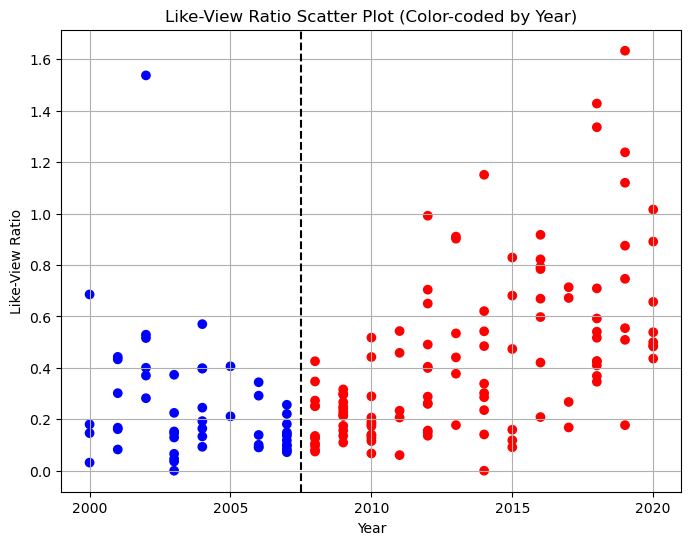

In [74]:
# Color-coding by year
colors = highviews_df['year'].apply(lambda x: 'blue' if x < 2008 else 'red')

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter( highviews_df['year'], highviews_df['ratio'], c=colors)
plt.ylabel('Like-View Ratio')
plt.xlabel('Year')
plt.title('Like-View Ratio Scatter Plot (Color-coded by Year)')
plt.grid(True)
plt.xticks(range(2000, 2021, 5))

plt.axvline(x=2007.5, color='black', linestyle='--')
plt.show()



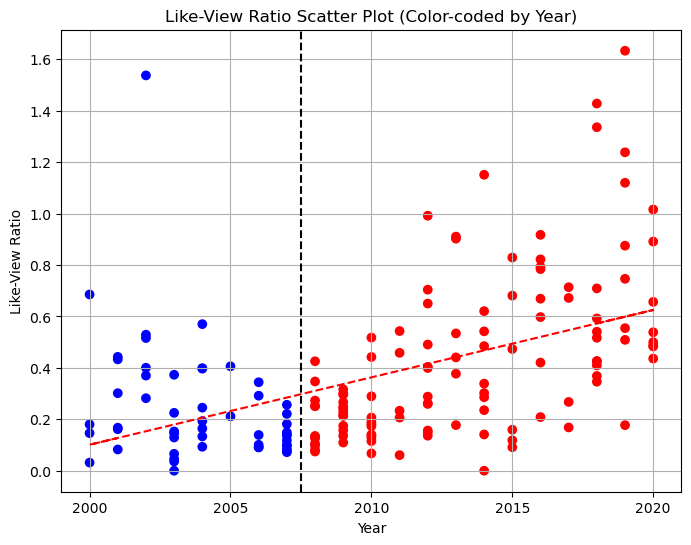

In [75]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(highviews_df['year'], highviews_df['ratio'], c=colors)
plt.ylabel('Like-View Ratio')
plt.xlabel('Year')
plt.title('Like-View Ratio Scatter Plot (Color-coded by Year)')
plt.grid(True)

# Set x-axis ticks to every five years from 2000 to 2020
plt.xticks(range(2000, 2021, 5))

# Add vertical dotted line at x=2007.5
plt.axvline(x=2007.5, color='black', linestyle='--')

# Add trend line
z = np.polyfit(highviews_df['year'], highviews_df['ratio'], 1)
p = np.poly1d(z)
plt.plot(highviews_df['year'], p(highviews_df['year']), "r--")

plt.show()

/Users/matt/anaconda3/envs/dev/lib/python3.10/site-packages/mpld3/mplexporter/exporter.py:84: UserWarning: Blended transforms not yet supported. Zoom behavior may not work as expected.
  warnings.warn("Blended transforms not yet supported. "


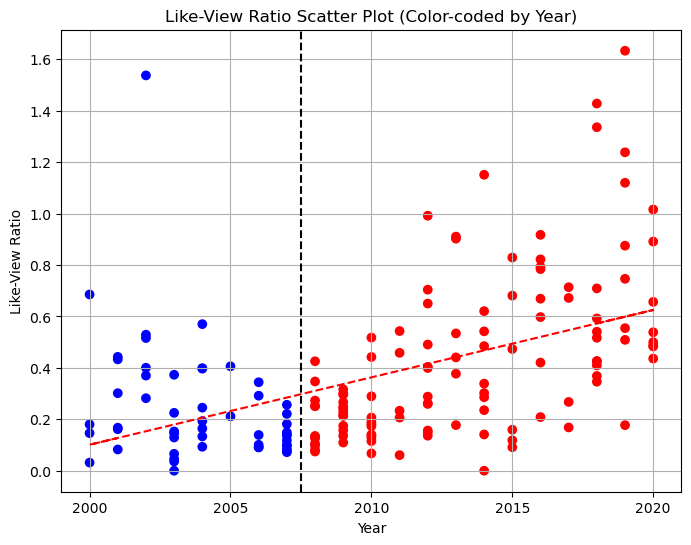

In [93]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(highviews_df['year'], highviews_df['ratio'], c=colors)
plt.ylabel('Like-View Ratio')
plt.xlabel('Year')
plt.title('Like-View Ratio Scatter Plot (Color-coded by Year)')
plt.grid(True)

# Set x-axis ticks to every five years from 2000 to 2020
plt.xticks(range(2000, 2021, 5))

# Add vertical dotted line at x=2007.5
plt.axvline(x=2007.5, color='black', linestyle='--')

# Add trend line
z = np.polyfit(highviews_df['year'], highviews_df['ratio'], 1)
p = np.poly1d(z)
plt.plot(highviews_df['year'], p(highviews_df['year']), "r--")


# plt.savefig('view_like_ratio.png')
html_output = mpld3.fig_to_html(plt.gcf())

# Save the HTML output to a file
with open('plot.html', 'w') as f:
    f.write(html_output)
plt.show()


In [77]:
before_2008 = highviews_df[highviews_df['year'] < 2008]['like_count']
after_2008 = highviews_df[highviews_df['year'] >= 2008]['like_count']
ttest_ind(before_2008, after_2008)

TtestResult(statistic=-1.5032095339717226, pvalue=0.13468508078951494, df=166.0)

([<matplotlib.axis.XTick at 0x15be69030>,
 [Text(2000, 0, '2000'),
  Text(2005, 0, '2005'),
  Text(2010, 0, '2010'),
  Text(2015, 0, '2015'),
  Text(2020, 0, '2020')])

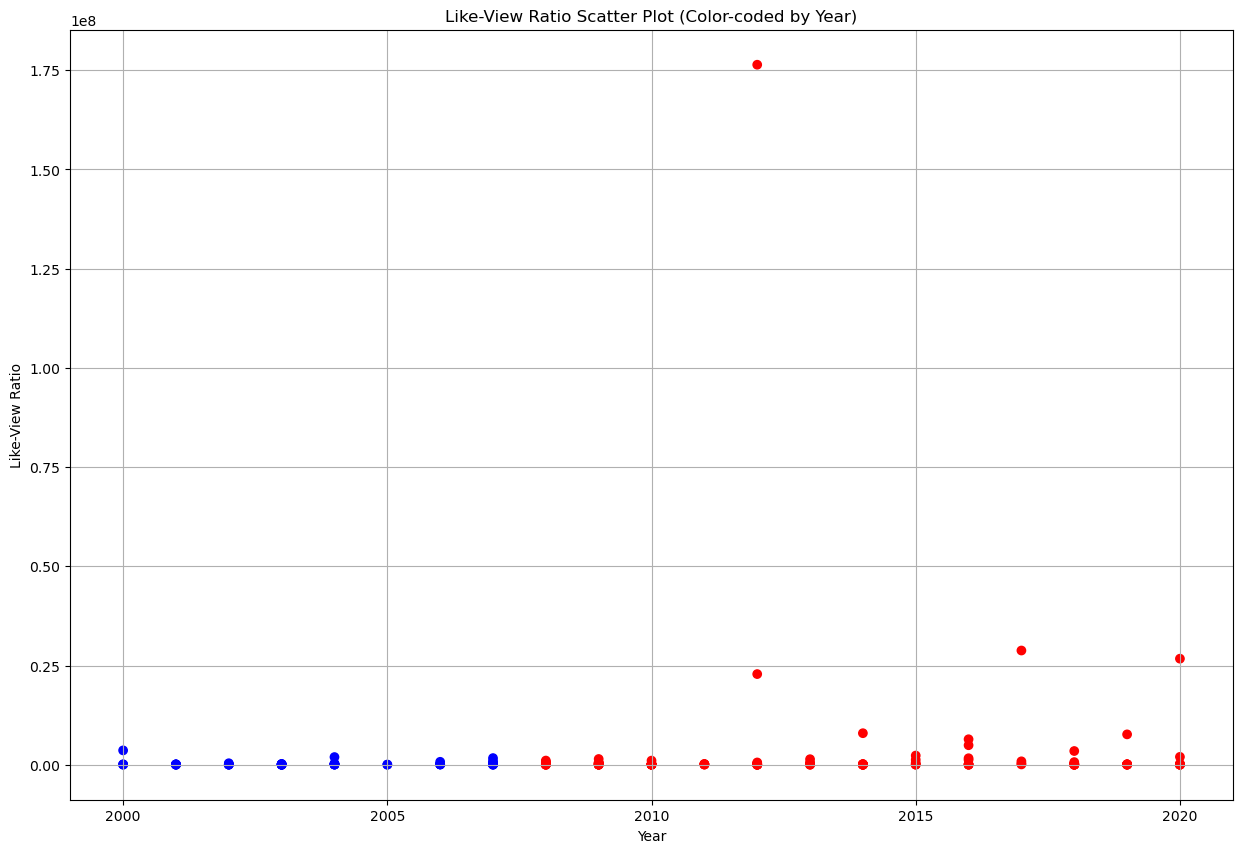

In [90]:
# Scatter plot
plt.figure(figsize=(15, 10))
plt.scatter(highviews_df['year'], highviews_df['view_count'], c=colors)
plt.ylabel('Like-View Ratio')
plt.xlabel('Year')
plt.title('Like-View Ratio Scatter Plot (Color-coded by Year)')
plt.grid(True)

# Set x-axis ticks to every five years from 2000 to 2020
plt.xticks(range(2000, 2021, 5))

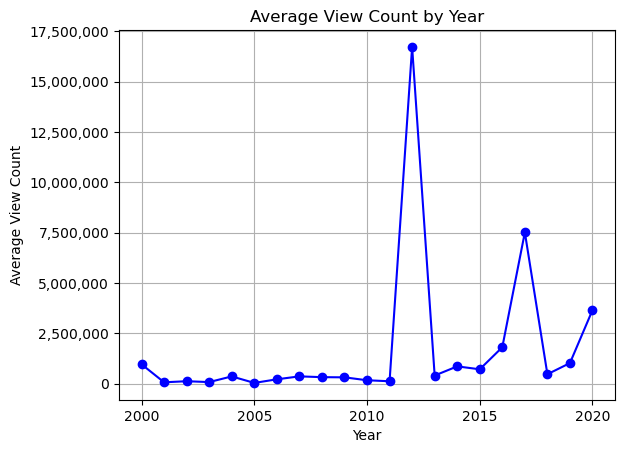

<Figure size 640x480 with 0 Axes>

In [96]:
average_view_count_by_year = highviews_df.groupby('year')['view_count'].mean()

average_view_count_by_year.plot(kind='line', marker='o', color='b', linestyle='-')






# Add labels and title
plt.title('Average View Count by Year')
plt.xlabel('Year')
plt.ylabel('Average View Count')
plt.xticks(range(2000, 2021, 5))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, p: format(int(y), ',')))
# plt.gca().ticklabel_format(style='plain', axis='y')



# Show the plot
plt.grid(True)

plt.show()

html_output1 = mpld3.fig_to_html(plt.gcf())

# Save the HTML output to a file
with open('plot1.html', 'w') as f:
    f.write(html_output1)
plt.show()